## Maybank - Next Best Action Analysis by Lee Xuan Rui (Ray), 10 May 21 (Mon)

### Question: Can we predict the next best action for each customer based on their profile and previous touchpoints?

### Methodology:

#### 1. Data set is cleaned
#### 2. Exploratory Analysis is done to determine basic statistical description of the data set as well as correlation of relevant variable(s)
#### 3. Relevant variables for Segmentation are identified
#### 4. All the above help to provide the context around what Next Best Action Campaigns we can launch for each Segment

### Summary:

#### 1. Number of Touchpoints users interacted with showed the greatest amount of correlation (0.26) with Average Spend.
#### 2. The "best" way to segment our users based on Average Spend is via either Income or Number of Touchpoints.
#### 3. These user segmentation can be realistically created in our CRM / Customer Data Platform / Analytics & Media Platforms (e.g. Salesforce, Google Analytics, Firebase, etc. where such data variables like the users' Income and Engagement are available).
#### 4. The kind of Content to create can be determined after the relevant Segments are created, an Analysis is performed on Google Analytics or Firebase to evaluate what these different Segments engage with.
#### 5. There is a sizable untapped opportunity here since 5,000 users, which is 25% of our data set, did not have an interaction with our Content / Assets before. Thus, uncovering what they are interested in before targeting them will be critical.
#### 6. The ideal Channel to reach out to these Segments will be via emailDestination or emailDiscount, since those are popular touchpoints.

### 1. Importing the Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

sns.set()

### 2. Reading in the Excel File

In [2]:
df = pd.read_excel("Marketing_Next_Best_Action Use Case.xlsx")
df.head()

,age,marital,segment,SocialMedia,income,creditRating,aveSpend,touchpoints,nTouchpoints
0,38,single,P4,,51000.0,C,5007.50,emailDestination mailDiscount,2
1,39,divorced,P3,,100000.0,B,19.74,emailDestination mailGift,2
2,41,married,P4,N,51000.0,D,320.10,emailDiscount mailGift emailDiscount,3
3,57,single,P2,Y,80600.0,C,164.21,NaN,0
4,60,married,P4,,152000.0,C,39.47,mailDiscount,1


In [3]:
#  Understanding the data types for each column of data
df.dtypes

age               int64
marital          object
segment          object
SocialMedia      object
income          float64
creditRating     object
aveSpend        float64
touchpoints      object
nTouchpoints      int64
dtype: object

In [4]:
# Identifying where null or missing values arise
df.isnull().sum()

age                0
marital            0
segment            0
SocialMedia        0
income             0
creditRating     583
aveSpend           0
touchpoints     5000
nTouchpoints       0
dtype: int64

### 3. Handling Missing, Null, Whitespace Values

#### From the previous section and after an exploratory glance of the Excel document, there are some missing, null and whitespace values to resolve if it makes sense:

##### A. SocialMedia: Whitespace values - Replace with an "Unknown" string.
##### B. creditRating: Null values - Replace with an "Unknown" string.
##### C. touchpoints: Missing values - No action needed, since these users did not interact with any touchpoint. But do note that this mean 5,000 users have yet to interact with our Content / Assets.

#### 3A. SocialMedia Column Cleaning

In [5]:
# Identifies the index positions where there is a whitespace and replaces it with "Unknown"
SocialMedia_mask = df["SocialMedia"] == " "
df.loc[SocialMedia_mask, "SocialMedia"] = "Unknown"
df.head()

,age,marital,segment,SocialMedia,income,creditRating,aveSpend,touchpoints,nTouchpoints
0,38,single,P4,Unknown,51000.0,C,5007.50,emailDestination mailDiscount,2
1,39,divorced,P3,Unknown,100000.0,B,19.74,emailDestination mailGift,2
2,41,married,P4,N,51000.0,D,320.10,emailDiscount mailGift emailDiscount,3
3,57,single,P2,Y,80600.0,C,164.21,NaN,0
4,60,married,P4,Unknown,152000.0,C,39.47,mailDiscount,1


In [6]:
# Checks and ensures that all whitespace values were indeed populated with "Unknown"
df[df["SocialMedia"] == " "]

,age,marital,segment,SocialMedia,income,creditRating,aveSpend,touchpoints,nTouchpoints


#### 3B. creditRating Column Cleaning

In [7]:
# Identifies the index positions where there is a null value and replaces it with "Unknown"
creditRating_mask = df["creditRating"].isnull() == True
df.loc[creditRating_mask, "creditRating"] = "Unknown"
df.head()

,age,marital,segment,SocialMedia,income,creditRating,aveSpend,touchpoints,nTouchpoints
0,38,single,P4,Unknown,51000.0,C,5007.50,emailDestination mailDiscount,2
1,39,divorced,P3,Unknown,100000.0,B,19.74,emailDestination mailGift,2
2,41,married,P4,N,51000.0,D,320.10,emailDiscount mailGift emailDiscount,3
3,57,single,P2,Y,80600.0,C,164.21,NaN,0
4,60,married,P4,Unknown,152000.0,C,39.47,mailDiscount,1


In [8]:
# Checks and ensures that all null values were indeed populated with "Unknown"
df[df["creditRating"].isnull()]

,age,marital,segment,SocialMedia,income,creditRating,aveSpend,touchpoints,nTouchpoints


#### 3D. touchpoints Column Cleaning

##### For the touchpoints Column's missing values, no action is needed, since these users did not interact with any touchpoint.

In [9]:
# Let's run through the validation for each cleaned Column again just to be sure
df.isnull().sum()

age                0
marital            0
segment            0
SocialMedia        0
income             0
creditRating       0
aveSpend           0
touchpoints     5000
nTouchpoints       0
dtype: int64

In [10]:
df[df["SocialMedia"] == " "]

,age,marital,segment,SocialMedia,income,creditRating,aveSpend,touchpoints,nTouchpoints


In [11]:
df[df["creditRating"].isnull()]

,age,marital,segment,SocialMedia,income,creditRating,aveSpend,touchpoints,nTouchpoints


### 4. Exploratory Analysis

#### Here's a summary of what we learnt from our 20,000 data points:

##### Variable Correlation: There is a weak linear correlation (0.26) between Number of Touchpoints and Average Spend.

##### Purchase Pattern: An overwhelming amount of users (18,960; 94.8%) spent between 1 to 3,999.

##### A. age: Slightly right skewed, with our users having a mean age of 39 years old.
##### B. income: Right skewed, with our users' mean income at aroud 71,500.
##### C. nTouchpoints: Right skewed, that means our users interact with our Content / Assets on average of 2.3 times. (Do note that 5,000, which is 25% of users, did not have an interaction with our Content / Assets before.)
##### D. marital: Most are married (12,032; 60.2%) followed by Single (5,871; 29.4%) then Divorced (2,046; 10.2%).
##### E. Segment: Segment, as defined by Maybank, is relatively evenly distributed. P2 (25.6%) > P1 (25.2%) > P3 (24.8%) > P4 (24.4%).
##### F. creditRating: Top 3 are - C (25.7%), B (25.3%) and A (20.5%).
##### G. touchpoints: Top 5 are - emailDestination (11.9%), emailDiscount (4.8%), mailDiscount (2.4%), emailDestination emailDestination (2.1%), smsDiscount (2.0%) (Do note that 5,000, which is 25% of users, did not have an interaction with our Content / Assets before.)

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

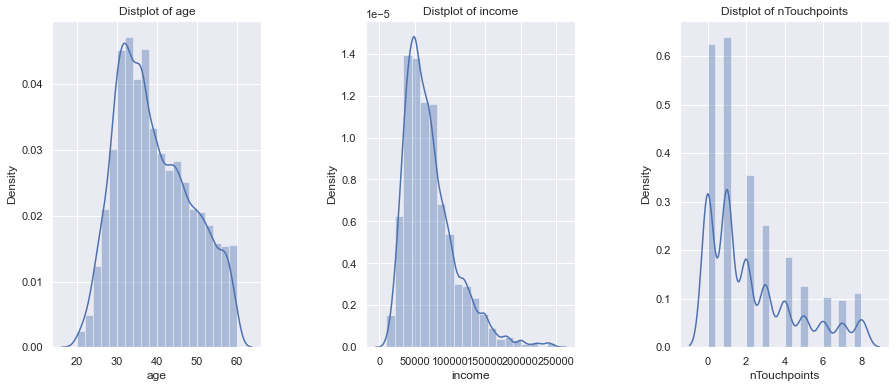

In [12]:
# Plot and visualize the distribution of age, income and nTouchpoints

plt.figure(1, figsize=(15,6))
n=0
for x in ["age", "income", "nTouchpoints"]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins = 20)
    plt.title("Distplot of {}".format(x))
plt.show()

In [13]:
df.describe()

,age,income,aveSpend,nTouchpoints
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.203100,71504.298145,730.573514,2.276000
std,9.276807,36607.960695,2221.160837,2.299497
min,20.000000,10000.000000,0.000000,0.000000
25%,32.000000,45000.000000,20.830000,0.750000
50%,38.000000,64000.000000,93.250000,1.000000
75%,46.000000,89813.000000,427.500000,4.000000
max,60.000000,249000.000000,18156.700000,8.000000


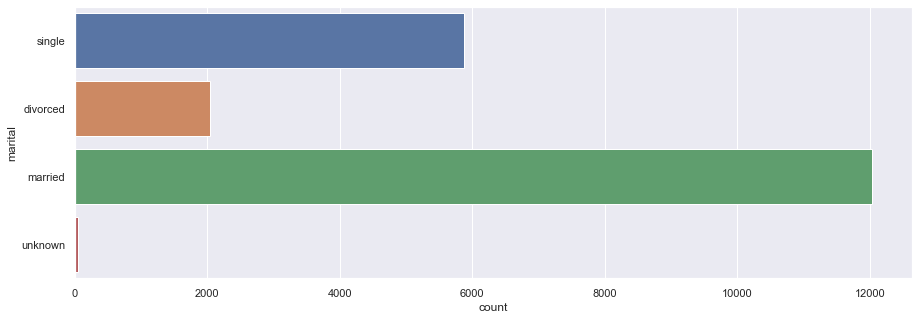

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(y="marital", data=df)
plt.show()

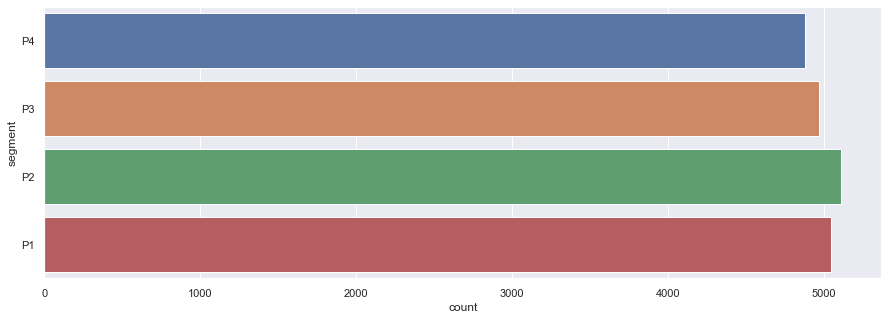

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(y="segment", data=df)
plt.show()

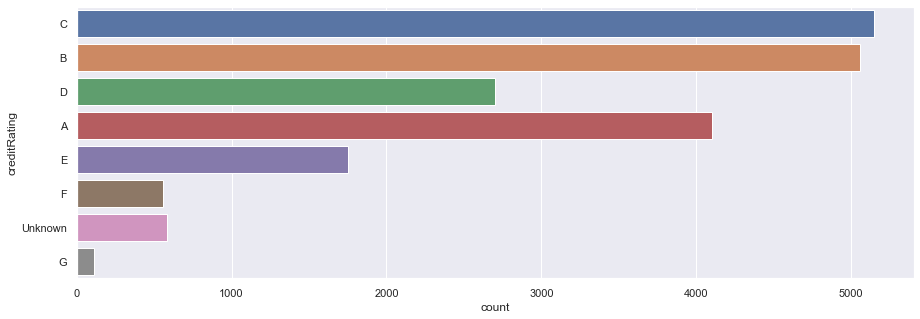

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(y="creditRating", data=df)
plt.show()

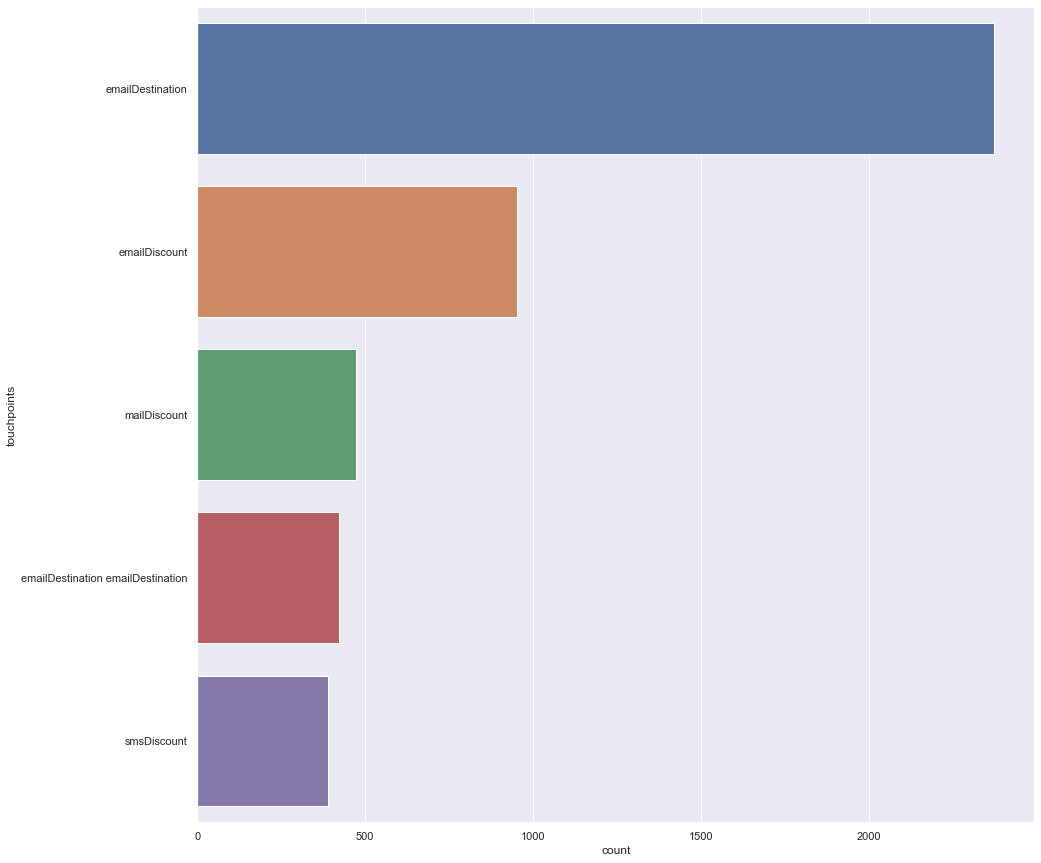

In [17]:
plt.figure(figsize=(15,15))
sns.countplot(y="touchpoints", data=df, order=df.touchpoints.value_counts().iloc[:5].index)
plt.show()

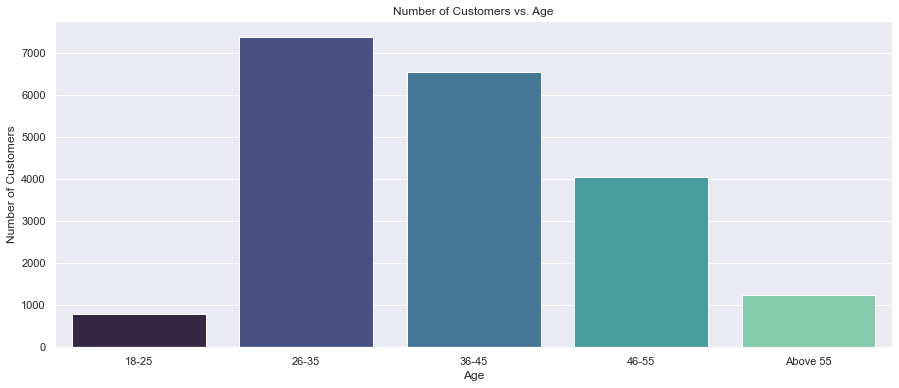

In [18]:
# We can attempt to categorize the age of our users into logical groups for ease of analysis
# From the previous section, we know that the min of age is 20 and the max of age is 70

age_18_25 = df.age[(df.age >= 18) & (df.age <= 25)]
age_26_35 = df.age[(df.age >= 26) & (df.age <= 35)]
age_36_45 = df.age[(df.age >= 36) & (df.age <= 45)]
age_46_55 = df.age[(df.age >= 46) & (df.age <= 55)]
age_55_above = df.age[df.age >= 56]

agex = ["18-25", "26-35", "36-45", "46-55", "Above 55"]
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55_above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x = agex, y = agey, palette = "mako")
plt.title("Number of Customers vs. Age")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

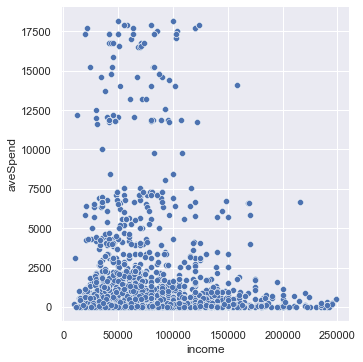

In [19]:
sns.relplot(x = "income", y = "aveSpend", data = df)

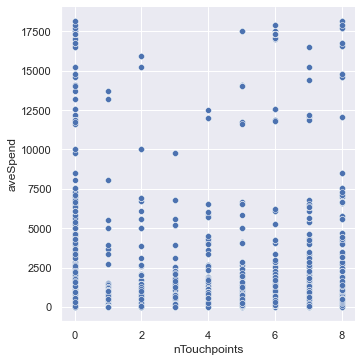

In [21]:
sns.relplot(x = "nTouchpoints", y = "aveSpend", data = df)

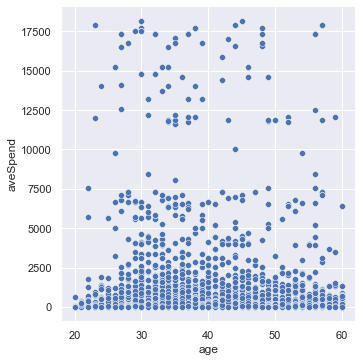

In [26]:
sns.relplot(x = "age", y = "aveSpend", data = df)

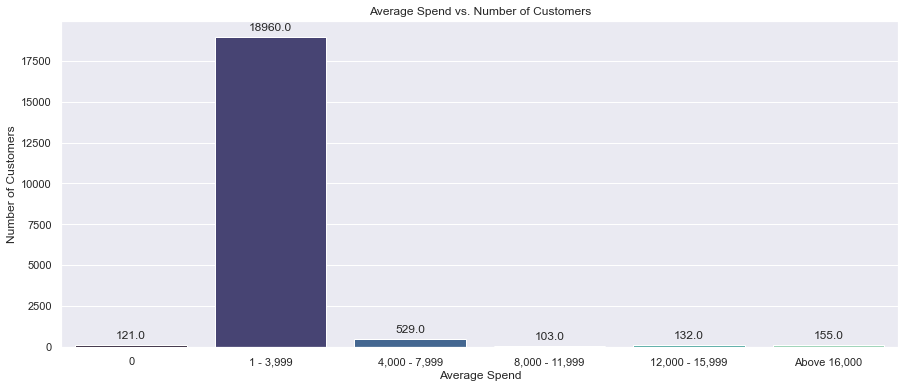

In [30]:
# Now, from the above, it is hard to see the relationship between our variables with aveSpend
# So there's an opportunity to categorize it further
# From the previous section, we know that the min of aveSpend is 0 and the max of aveSpend is 18,156.7

aveSpend_0 = df.aveSpend[(df.aveSpend == 0)]
aveSpend_1_3999 = df.aveSpend[(df.aveSpend > 0) & (df.aveSpend < 4000)]
aveSpend_4000_7999 = df.aveSpend[(df.aveSpend >= 4000) & (df.aveSpend < 8000)]
aveSpend_8000_11999 = df.aveSpend[(df.aveSpend >= 8000) & (df.aveSpend < 12000)]
aveSpend_12000_15999 = df.aveSpend[(df.aveSpend >= 12000) & (df.aveSpend < 16000)]
aveSpend_16000_above = df.aveSpend[(df.aveSpend >= 16000)]

aveSpendx = ["0", "1 - 3,999", "4,000 - 7,999", "8,000 - 11,999", "12,000 - 15,999", "Above 16,000"]
aveSpendy = [len(aveSpend_0.values), len(aveSpend_1_3999.values), len(aveSpend_4000_7999.values), len(aveSpend_8000_11999.values), len(aveSpend_12000_15999.values), len(aveSpend_16000_above.values)]

plt.figure(figsize=(15,6))
splot = sns.barplot(x = aveSpendx, y = aveSpendy, palette = "mako")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Average Spend vs. Number of Customers")
plt.xlabel("Average Spend")
plt.ylabel("Number of Customers")
plt.show()

In [31]:
# Determine the linear correlation between variables in our data set

df.corr()

# There is a weak positive correlation between Average Spend and Number of Touchpoints 
# a user interacted with (0.26)

,age,income,aveSpend,nTouchpoints
age,1.000000,-0.004752,-0.022572,-0.018199
income,-0.004752,1.000000,-0.016968,0.008988
aveSpend,-0.022572,-0.016968,1.000000,0.258615
nTouchpoints,-0.018199,0.008988,0.258615,1.000000


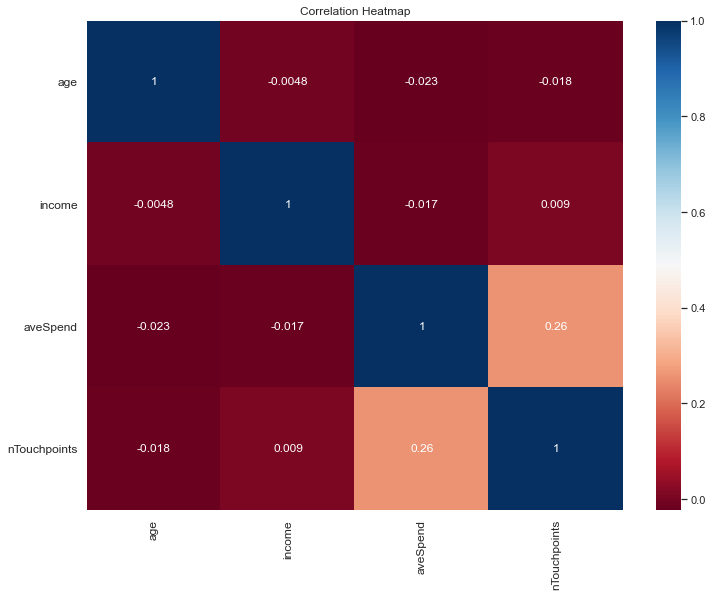

In [32]:
plt.figure(figsize = (12,9))
s = sns.heatmap(df.corr(),
               annot = True,
               cmap = "RdBu")
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title("Correlation Heatmap")
plt.show()

### 5. Segmentation Analysis

#### The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. This helps to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets.

##### While Age did not make that much sense for Segmentation, both Income and Number of Touchpoints can be utilized to create Segments to target for our Next Best Action Campaigns.

#### 5A. Cluster by Age vs. aveSpend

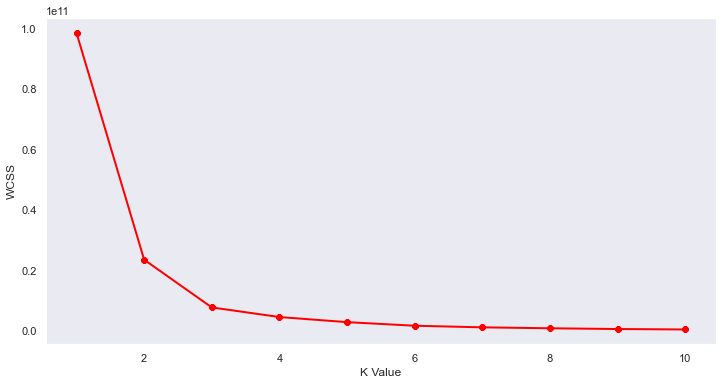

In [34]:
# Now that we have visualized and analyzed our data, we can start the clustering process here
# We will attempt to find how many clusters we should create with age vs. aveSpend

X1 = df.loc[:, ["age", "aveSpend"]].values

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

# Optimal clusters is 4

In [35]:
# Predict the labels of clusters

kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(X1)

print(label)

[3 0 0 ... 3 0 0]


In [36]:
# Checking the centroids

print(kmeans.cluster_centers_)

[[   39.27652883   156.09819744]
 [   38.30140845 14913.23478873]
 [   38.92788462  1696.33888889]
 [   38.49751244  5740.49665008]]


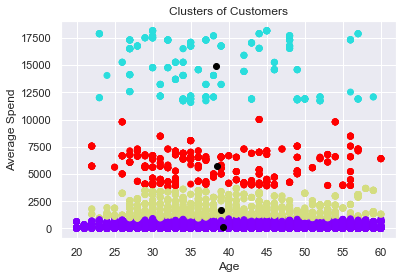

In [37]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.ylabel("Average Spend")
plt.show()

#### 5B. Cluster by Income vs. aveSpend

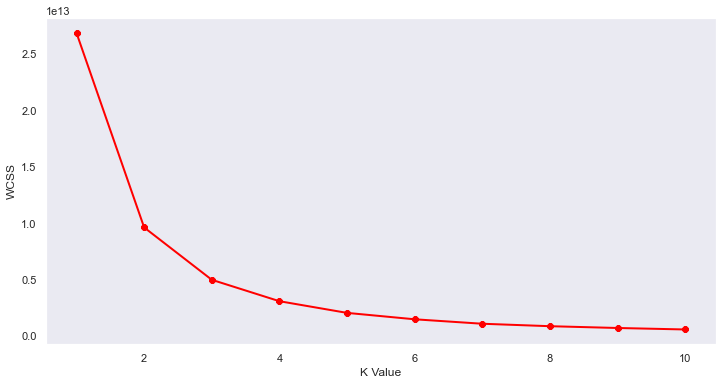

In [40]:
X2 = df.loc[:, ["income", "aveSpend"]].values

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

# Optimal clusters is 4

In [41]:
# Predict the labels of clusters

kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(X2)

print(label)

[0 1 0 ... 0 3 3]


In [42]:
# Checking the centroids

print(kmeans.cluster_centers_)

[[ 41623.7631844     728.12453546]
 [113080.84833536    723.07260632]
 [172645.41087549    523.94466926]
 [ 73158.90460803    766.28345845]]


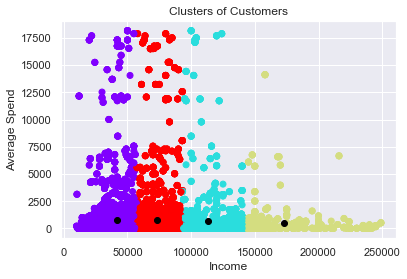

In [43]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("Clusters of Customers")
plt.xlabel("Income")
plt.ylabel("Average Spend")
plt.show()

#### 5C. Cluster by nTouchpoints vs. aveSpend

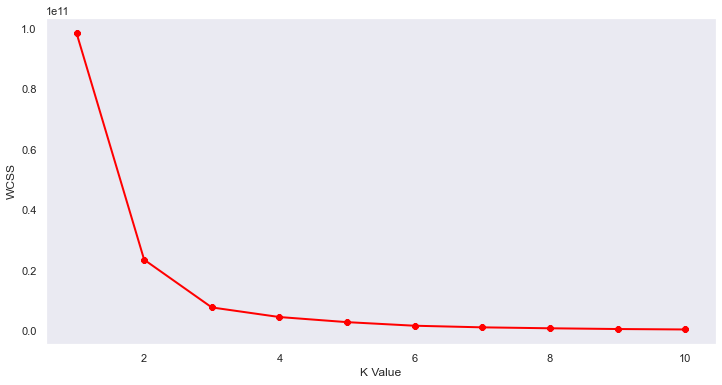

In [44]:
X3 = df.loc[:, ["nTouchpoints", "aveSpend"]].values

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

# Optimal clusters is 3

In [45]:
# Predict the labels of clusters

kmeans = KMeans(n_clusters=3)

label = kmeans.fit_predict(X3)

print(label)

[0 1 1 ... 0 1 1]


In [46]:
# Checking the centroids

print(kmeans.cluster_centers_)

[[4.20486111e+00 4.90270666e+03]
 [2.14305496e+00 2.67964091e+02]
 [4.58055556e+00 1.48451054e+04]]


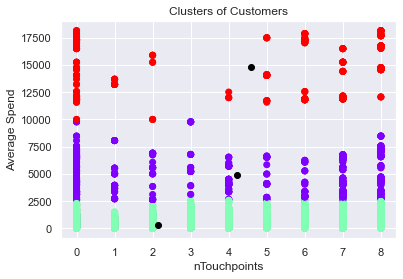

In [47]:
plt.scatter(X3[:,0], X2[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("Clusters of Customers")
plt.xlabel("nTouchpoints")
plt.ylabel("Average Spend")
plt.show()

### The End
### Thank you!